<a href="https://colab.research.google.com/github/nikhilgarg614/linearalgebraproject/blob/main/titanik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Making Linear Algebra Practical
On Kaggle there exists an indefinite beginner competition to make a machine learning model to predict which passengers survived the titanic shipwreck. They are given a training dataset that provides a list of the titanic's passengers, their id, gender, age, class, and more.


I am going to try a few survival patterns manually, then train a Random Forest machine learning model to predict survival based on specific passenger features. This model uses linear algebra concepts, although it is hidden in the inner workings of the model.

In [4]:
#This code enables me to pull data from my drive as well as analyze it
#just skip this part
from google.colab import drive
drive.mount('/content/drive')

import numpy as np #allows us to do matrix operations
import pandas as pd #analyze the data in our matrices/dataframes
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Passenger Data
Here is what a few rows of the passenger data may look like. It is represented as matrices where rows correspond to individual passengers while columns are features that are unique to each passenger.

####Quick Rundown of Unclear Columns:
Pclass = Ticket class	1 = 1st class, 2 = 2nd class, 3 = 3rd class

SibSp = # of siblings / spouses aboard the Titanic

Parch = # of parents / children aboard the Titanic

In [5]:
passengerData = pd.read_csv(r"/content/drive/Othercomputers/My Computer/pythonProj/titanic/train.csv")
passengerData.head(6)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q

##Loading the Data
Nothing too crazy here. Just need to load the dataframes/spreadsheets/matrices (all similar structures) into the notebook so we can begin analyzing and manipulating them.

It is important to note the "**train**" variable and the "**test**" variable, as it contains our training data and the data we will test the model with. The key difference between the two is that the test data does not tell us whether a passenger survived or not, we have to predict that on our own. As seen in the training data, there is an additional "Survived" colunmn with a 1 (passenger survived) or a 0 (passenger died).

In [6]:

#prints the content in a given directory
#gives us location of the data
dir = r'/content/drive/Othercomputers/My Computer/pythonProj/titanic'
for dirname, _, filenames in os.walk(dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/Othercomputers/My Computer/pythonProj/titanic/train.csv
/content/drive/Othercomputers/My Computer/pythonProj/titanic/gender_submission.csv
/content/drive/Othercomputers/My Computer/pythonProj/titanic/test.csv


In [7]:
#loading the training data
train = pd.read_csv(r"/content/drive/Othercomputers/My Computer/pythonProj/titanic/train.csv")

#check if it works
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
#Loading the testing (unlabeled) data
test = pd.read_csv(r'/content/drive/Othercomputers/My Computer/pythonProj/titanic/test.csv')

#check if it works
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

##Manual Survival Patterns
Before training the model, I made a few manual predictions of my own. First I wanted to see the survival rate of just men. I sliced the train data to just see the survival rate of men and it was pretty poor. I also wanted to see the survival rate of just 1st class women and it was pretty high.

It is important to note that these numbers only apply to the train data and not the test data. Additionally these survival rates only apply to the specific group of people I picked out.

In [9]:

#Example 1: Only Men Survive
men = train.loc[train.Sex == 'male', "Survived"] #loc[row, col] returns the survived col of every passenger that is a male
menSurvive = sum(men)/len(men)
print(f'{round(menSurvive*100, 3)}% of men survived')

#Example 2: Only 1st Class Women Survive
richWomen = train.loc[(train["Sex"] == 'female') & (train["Pclass"] == 1), "Survived"]
richWomenSurvive = sum(richWomen)/len(richWomen)
print(f'{round(richWomenSurvive*100, 3)}% of 1st class women survived')


18.891% of men survived
96.809% of 1st class women survived


##Preparing the Data
We must prepare the data for the model. The model cannot distinguish categorical data like Sex ("male" and "female"). And so we must use encoding to make it readable for the machine. As you will see, "Sex" gets split into Sex_female and Sex_male, with binary values indicating what sex the passenger is. A woman would have True in Sex_female and False in Sex_male, for example.

###Feature Matrix (X)
After encoding, we get two matrices which we will call "**feature matrices**". These matrices contain the features of each individual passenger in the train dataset that will be analyzed and test dataset that we will predict the survival of.

**Original:**

| Pclass    | Sex| SibSp| Parch|
| -------- | --- |-----|-----|
|2 | female |0 |0 |
| 3| male| 1| 0|

**Feature Matrix:**

| Pclass    |  SibSp| Parch|Sex_female|Sex_male|
| -------- | -----|-----|------|--------|
|2| 0 | 0| 1| 0|
|3| 1 | 0| 0| 1|



###Survival Vector (y)
The last element to explain is the "survival" vector, y. This vector contains the survival outcomes for each passenger in the dataset where 1 indicates survival and 0 indicates death. Our machine learning model will produce an outcome predicting the true values of this "Survival Vector" for the test dataset

In the code, the first few lines of each element is shown.

In [25]:

#Data Processing

#These are the features we will analyze: Pclass (class), Sex, SibSp (# of siblings/spouses), Parch (# of parents/children)
features = ["Pclass", "Sex", "SibSp", "Parch"]

#This converts categorical data (like "Sex") into numerical data
#Then a matrix is created where each column represents a binary feature.
#This matrix will be referred to as the **feature matrix**
X = pd.get_dummies(train[features]) #
Xtest = pd.get_dummies(test[features])

print('Training data feature matrix:')
print(X.head())
print('\nTest data feature matrix:')
print(Xtest.head())

#Target Variable - must analyze train to guess "Survived" for test
y = train["Survived"]
yhead = y.head()
print('\n"Survived" column of training dataset:')
print(yhead.to_string(index=False))

Training data feature matrix:
   Pclass  SibSp  Parch  Sex_female  Sex_male
0       3      1      0       False      True
1       1      1      0        True     False
2       3      0      0        True     False
3       1      1      0        True     False
4       3      0      0       False      True

Test data feature matrix:
   Pclass  SibSp  Parch  Sex_female  Sex_male
0       3      0      0       False      True
1       3      1      0        True     False
2       2      0      0       False      True
3       3      0      0       False      True
4       3      1      1        True     False

"Survived" column of training dataset:
0
1
1
1
0


##Random Forest Model
The Random Forest Model is an model that is constructed of several decision "trees" that will each look at each passengers data and vote whether they survived. The random forest model then makes a democratic decision to produce an output of what it thinks is the most likely outcome for the individual.

The model uses the training data feature matrix and survival vector to train, then applies it to the test dataset. Internally, there are a bunch of matrix operations going on to calculate how important each feature is and to predict the outcomes.

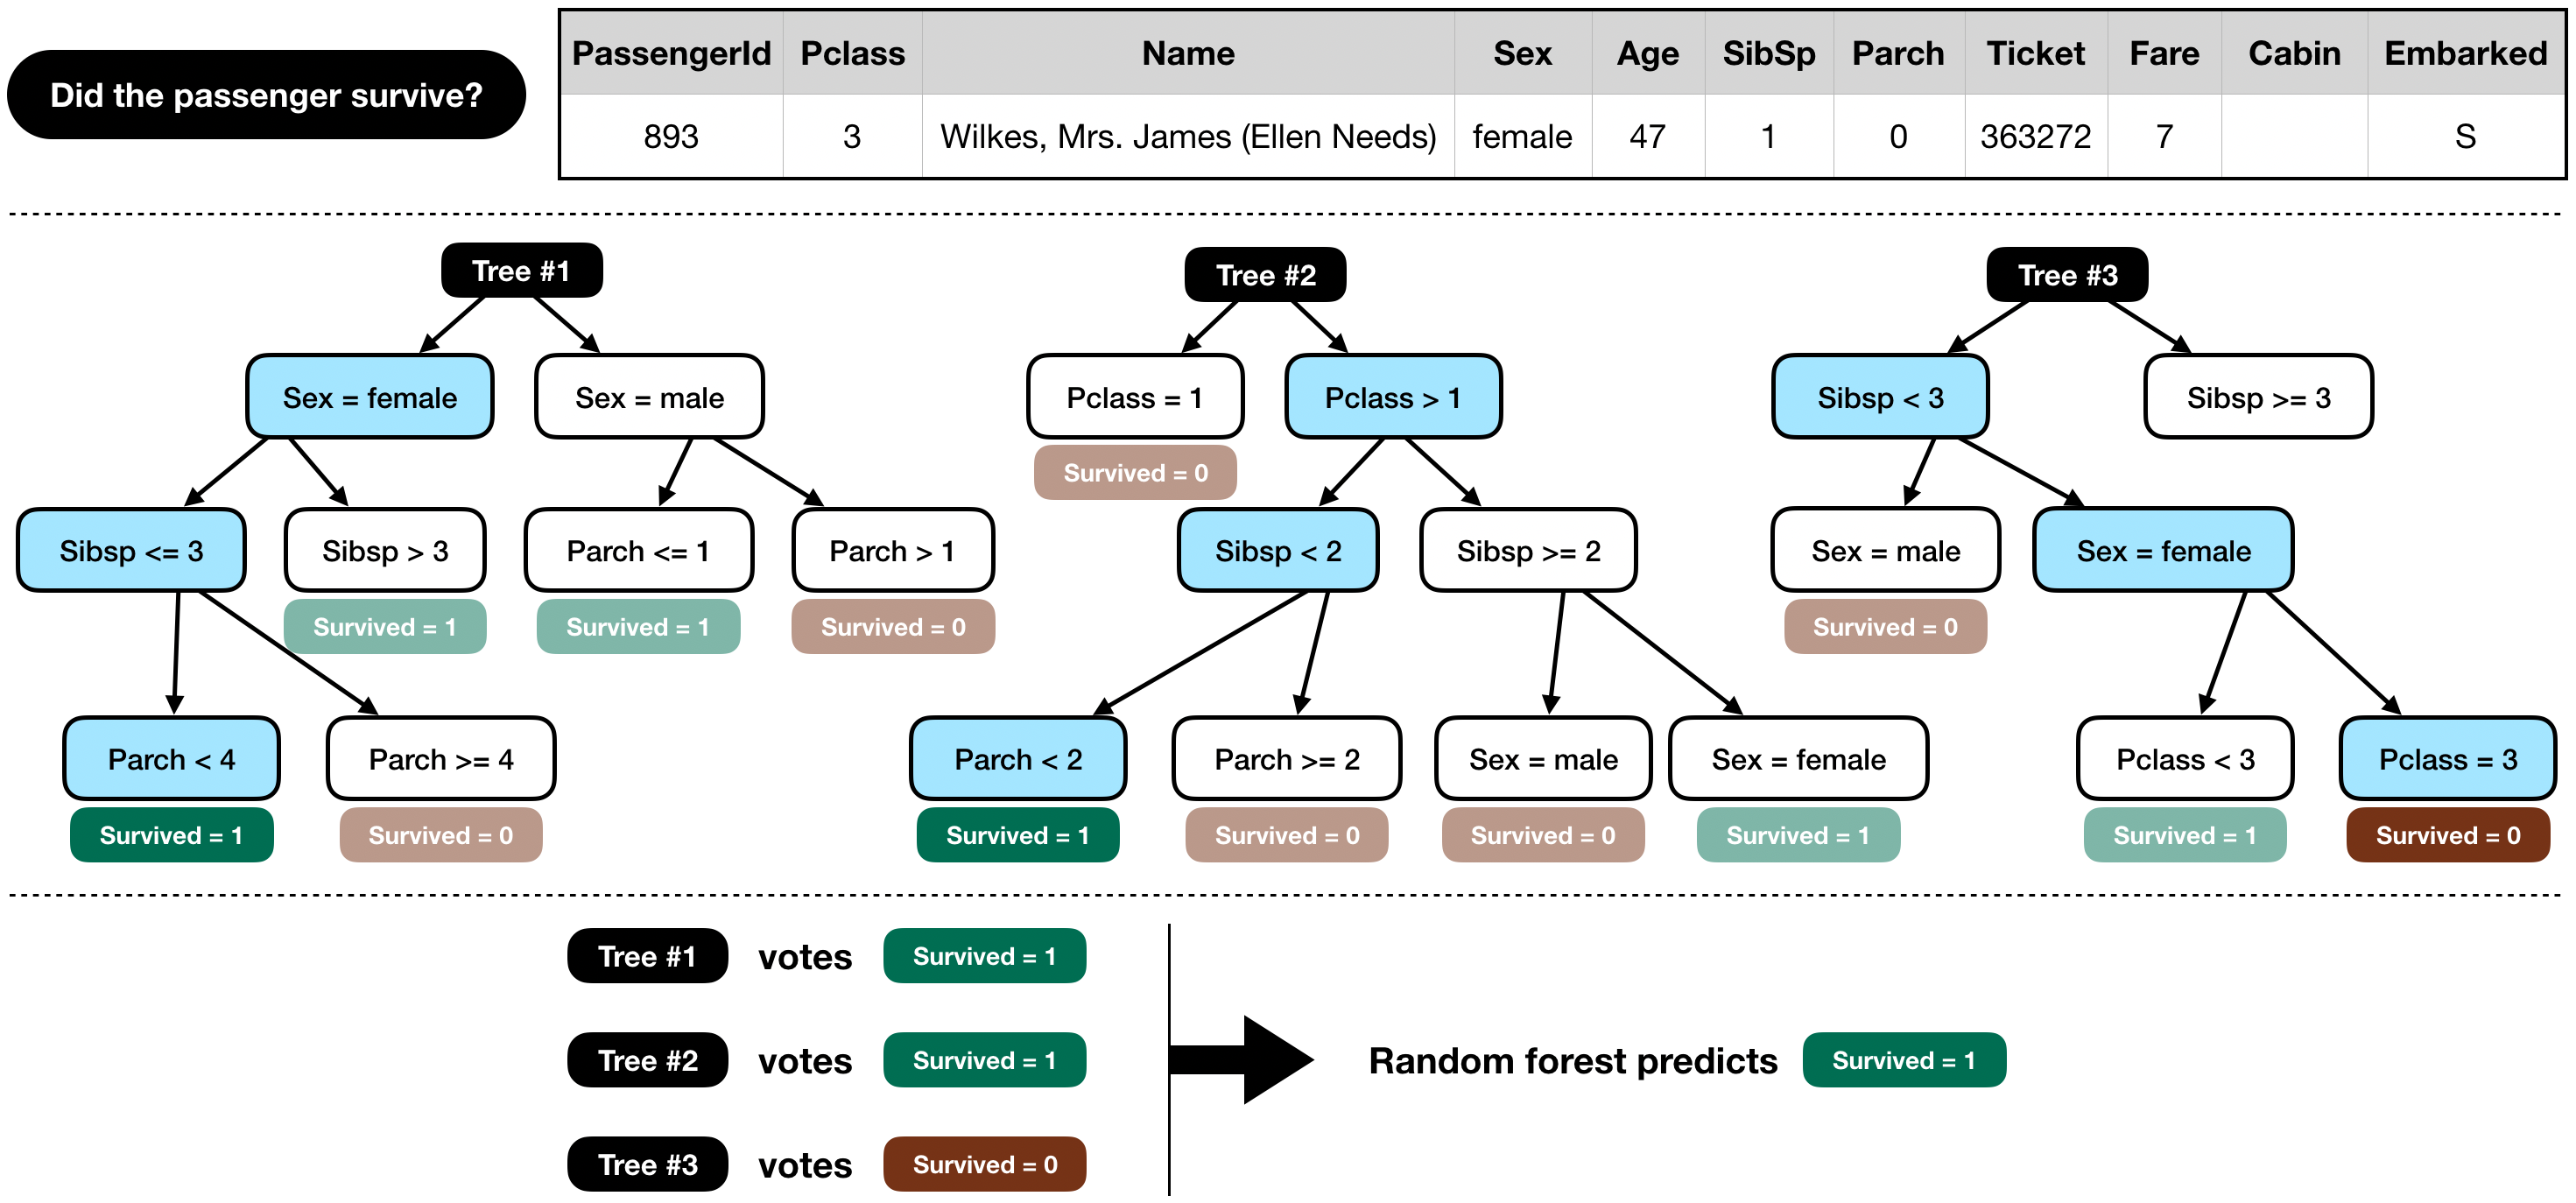

To check how the model did, I have to save it as a csv file. But since I already did that, that line is commented out.

In [26]:
#This is our Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier #for the model we are going to train

#Train the Random Forest model - uses decision trees
model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=1)
model.fit(X,y)

#predict passenger survival and put results into a matrix of 1s and 0s
predictions = model.predict(Xtest)

#Save the predictions to a CSV to get checked
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index = False)
output.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

##Extra Predictions
Just for fun and comparison, I have made a submission that predicts only 1st class women survive and one that predicts only men survive. This is the code to predict that and save the result to a csv file.

The code looks iteratively looks through each passenger, and if they have the features I am looking for, then it adds a 1 to the predicted Survival Matrix and a 0 otherwise.

In [28]:
#1st Class Survive
prediction2 = []
for _, passenger in test.iterrows():
    if passenger["Sex"] == 'female' and passenger["Pclass"] == 1:
        prediction2.append(1)
    else:
        prediction2.append(0)
prediction2 = np.array(prediction2)

#print(prediction2)
output2 = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived' : prediction2})
#output2.to_csv('submission2.csv', index = False)
output2.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [27]:
#Just Men Survive
prediction3 = []
for _, passenger in test.iterrows():
    if passenger["Sex"] == 'male':
        prediction3.append(1)
    else:
        prediction3.append(0)
prediction3 = np.array(prediction3)

output3 = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived' : prediction3})
#output3.to_csv('submission3.csv', index = False)
output3.head()

PassengerId  Survived
0          892         1
1          893         0
2          894         1
3          895         1
4          896         0

##Results
While I can't see the correct answers for the test dataset, Kaggle does tell me the accuracy for each submission I make. Here are the results:

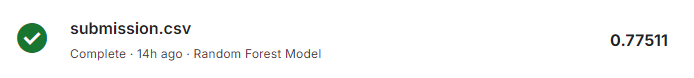
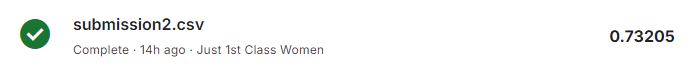
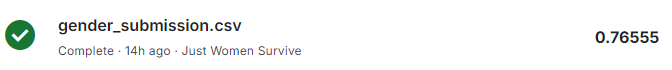
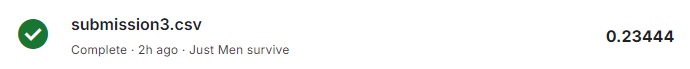

|Model|Accuracy|
|-----|--------|
|Random Forest| 77.518%|
| 1st Class Women| 73.205%|
| Just Women| 76.555%|
| Just Men| 23.444%|

As we can see, the Random Forest model achieved **77.518%** accuracy on the test dataset, which is higher than any of our other predictions. Our simple model managed to outperform the other methods by analyzing the relationships between each feature in these complex matrices. While this result isn't fully accurate, and only slightly more accurate than Just Women, it is still quite impressive. The model can of course be tuned to be more accurate, perhaps incorporating more features to be analyzed or even a different models, however this is sufficient.

##Software Used
- Google Colab: for final submission
- Python Libraries: numpy, pandas, scikit-learn
- Visual Studio Code: to write the code.



##Conclusion
My adventure into machine learning shows how Linear Algebra concepts are integrated into my Data Science field. We used matrices to represent the data of each passenger and a machine to perform operations and calculations on said matrices to uncover patterns we may not see ourselves. This model was only used for a beginner dataset, but these same techniques and concepts can be applied to real-world situations in my field all the time. I'm excited to encounter more applications of linear algebra within data science.